In [1]:
import matplotlib.pyplot as plt
import functools
import numpy as np
import pandas as pd
import math

In [2]:
def sigmoid(a, b, c, h, x):
    return np.divide(b, 1 + math.exp(-a * (x - c))) + h


def exponential(a, c, h, x):
    return math.exp(a * (x - c)) + h

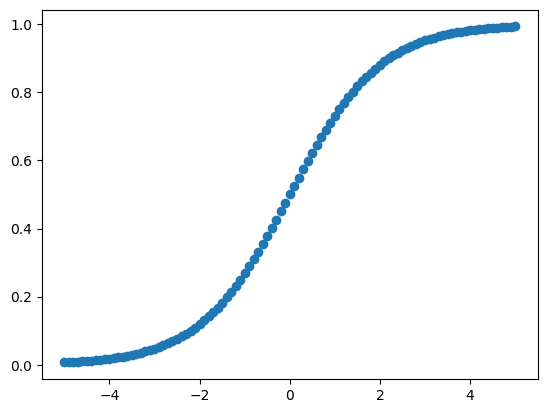

In [3]:
plt.scatter(
    x=np.linspace(-5, 5, 101),
    y=[sigmoid(a=1, b=1, c=0, h=0, x=x) for x in np.linspace(-5, 5, 101)],
)

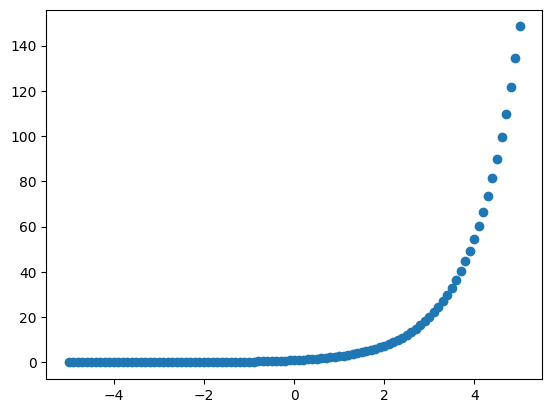

In [4]:
plt.scatter(
    x=np.linspace(-5, 5, 101),
    y=[exponential(a=1, c=0, h=0, x=x) for x in np.linspace(-5, 5, 101)],
)

In [5]:
class FittingClass:
    def __init__(
        self, distribution, lower_bound, upper_bound, sample_size, noise_function
    ):
        """
        :param distribution: a one parameter distribution over time. This will usually be a sigmoid or an exponential.
        :param lower_bound: the moment at which we start gethering data on the given function
        :param upper_bound: the last moment at which we start gethering data
        :param sample_size: the number of data points we want to gather.
        :param noise_function: A function that given an integer n, returns the noise for n data points. Usually these are assumed to be independent, but this might not be the case.
        """
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.distribution = distribution
        self.noise_function = noise_function
        self.sample_size = sample_size
        self.sample = self.generate_sample()
        self.plot_sample()

    def generate_sample(self):
        x = np.linspace(self.lower_bound, self.upper_bound, self.sample_size)
        y = np.array([self.distribution(x=z) for z in x]) + np.array(
            self.noise_function(self.sample_size)
        )
        return pd.DataFrame({"x": x, "y": y})

    def fit_sigmoid(self):
        pass

    def fit_exponential(self):
        pass

    def print_metrics(self):
        pass

    def plot_sample(self):
        plt.scatter(x=self.sample["x"], y=self.sample["y"])

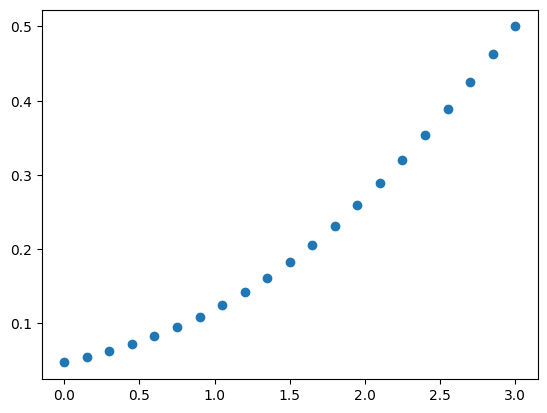

In [6]:
z = FittingClass(
    distribution=functools.partial(sigmoid, a=1, b=1, c=3, h=0),
    lower_bound=0,
    upper_bound=3,
    sample_size=21,
    noise_function=lambda n: [0] * n,
)